In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [6]:
df = pd.read_csv('PJME_hourly.csv')
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [7]:
# make date column our index
df.set_index('Datetime', inplace=True)

# convert string values of index to date format
df.index = pd.to_datetime(df.index)

In [8]:
# rename column for ease of use

df.rename(columns={'PJME_MW':'MW'},inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   MW      145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


In [10]:
df.describe()

,MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [11]:
df.tail()

,MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


<AxesSubplot:xlabel='Datetime'>

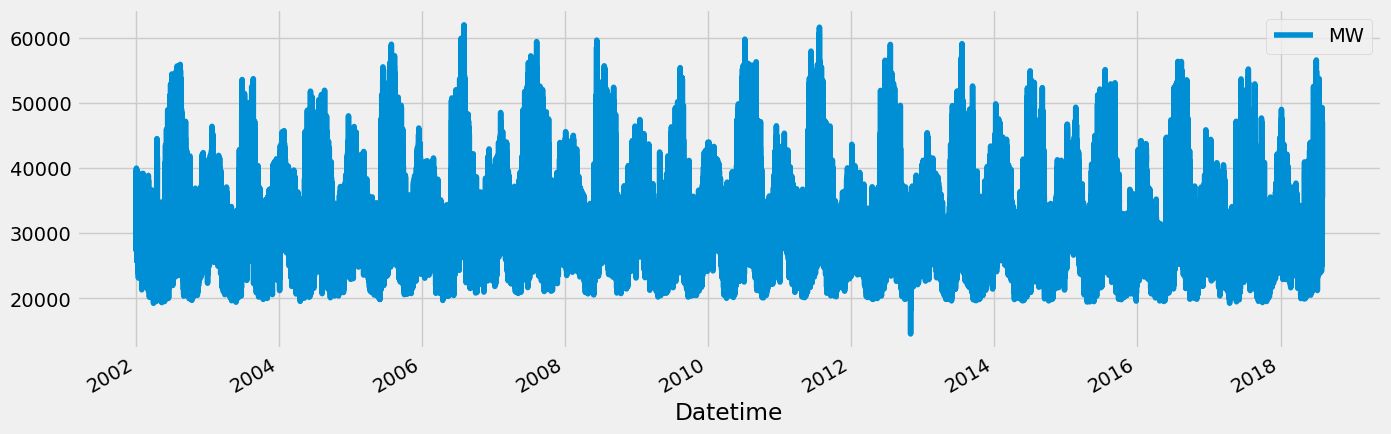

In [12]:
# our numerical values in float format caused problem. convert float to integers

df['MW'] = df['MW'].astype(int)
df.plot(figsize=(15,5))

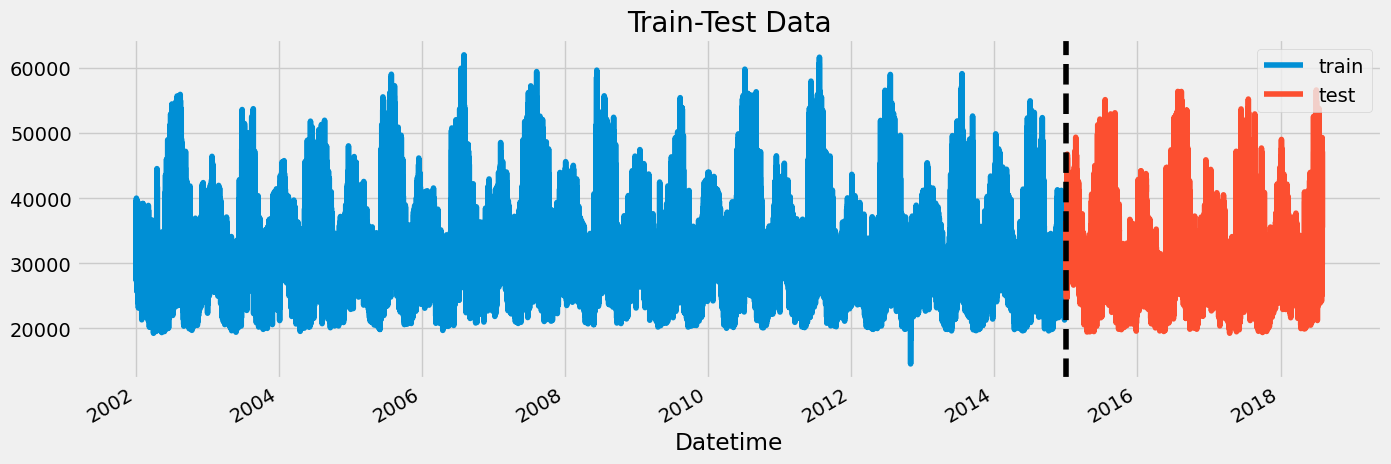

In [13]:
# create train-test sections and apply them to subplot-graph
# seasonality can be observed clearly

train = df.loc[df.index<'2015-1-1']
test  = df.loc[df.index>'2015-1-1']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='train')
test.plot(ax=ax, label='test')
ax.axvline('2015-1-1', color='black', ls='--')
ax.legend(['train','test'])
ax.set_title('Train-Test Data')
plt.show()

<AxesSubplot:xlabel='Datetime'>

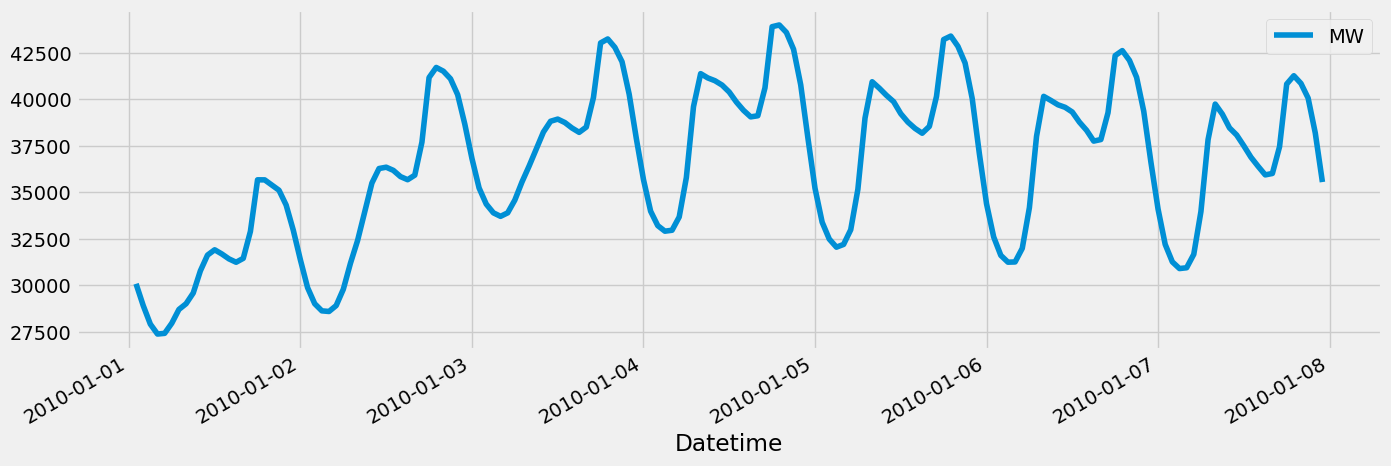

In [14]:
# magnify a short time span to increase our time resolution and observe how cyclical power consumption is

df.loc[(df.index>'2010-1-1') & (df.index<'2010-1-8')].plot(figsize=(15,5))


In [15]:
# increase dataFrame dimension by adding features from time units
# create explanatory features from index to help us make our prediction

def create_features(df):
    df['hour'] = df.index.hour
    df['day'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

df = create_features(df)

In [16]:
df.head()

,MW,hour,day,month,quarter,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498,1,1,12,4,2002,365
2002-12-31 02:00:00,25147,2,1,12,4,2002,365
2002-12-31 03:00:00,24574,3,1,12,4,2002,365
2002-12-31 04:00:00,24393,4,1,12,4,2002,365
2002-12-31 05:00:00,24860,5,1,12,4,2002,365


<AxesSubplot:xlabel='hour', ylabel='MW'>

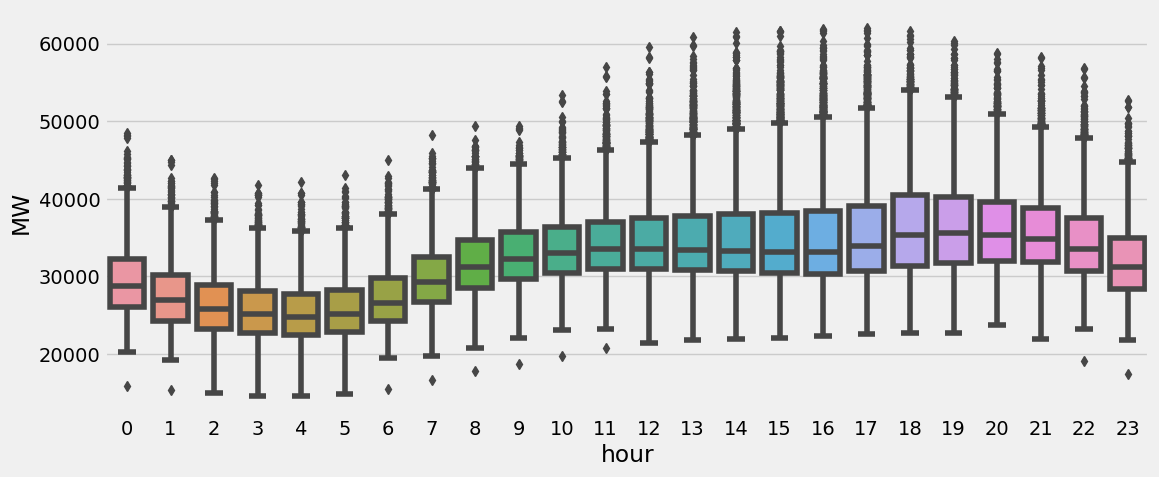

In [17]:
#observe how cyclical the hours are

fig = plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='hour', y='MW')


<AxesSubplot:xlabel='day', ylabel='MW'>

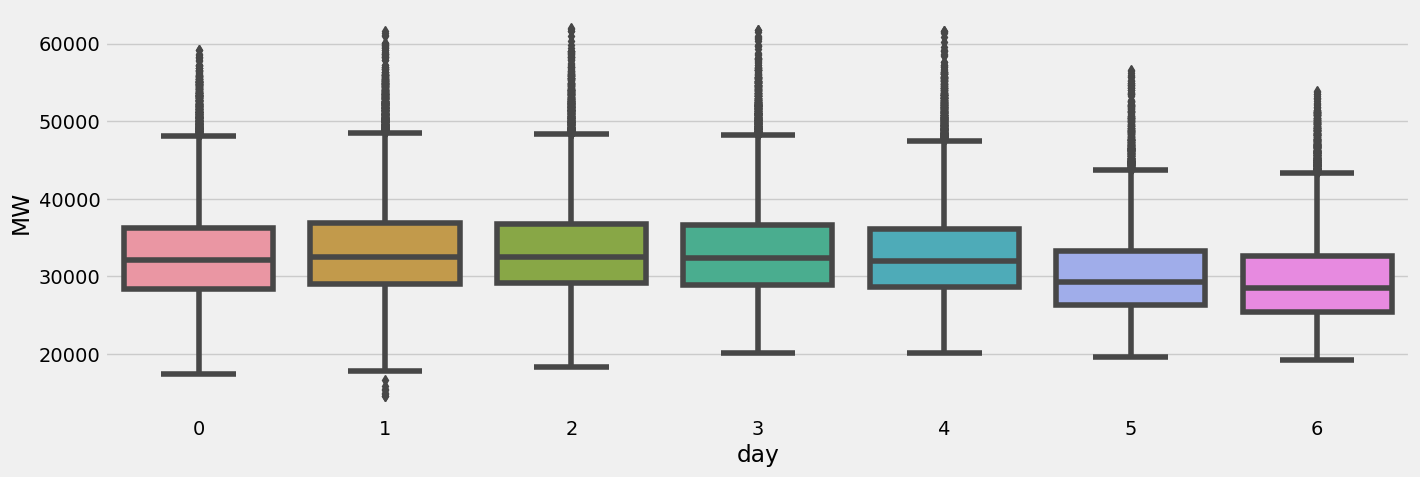

In [18]:
#observe how cyclical the days are

fig = plt.figure(figsize=(15,5))
sns.boxplot(x='day', y='MW', data=df)


<AxesSubplot:xlabel='month', ylabel='MW'>

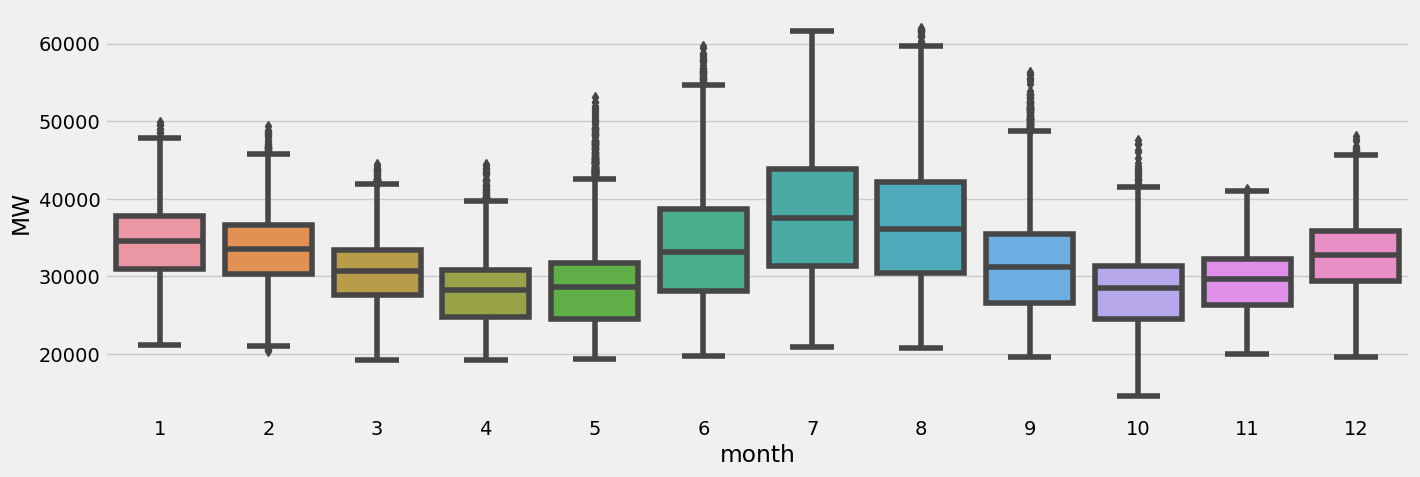

In [19]:
#observe how cyclical months are

fig = plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='month', y='MW')


In [20]:
# train-test-split

from sklearn.model_selection import train_test_split
df.columns


Index(['MW', 'hour', 'day', 'month', 'quarter', 'year', 'dayofyear'], dtype='object')

In [22]:
X = df.drop('MW',axis=1)
y = df['MW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)


In [23]:
# Start LinearRegression

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['coeff'])
cdf

,coeff
hour,455.340122
day,-591.614577
month,-84.759153
quarter,-203.706996
year,-81.563108
dayofyear,1.891620


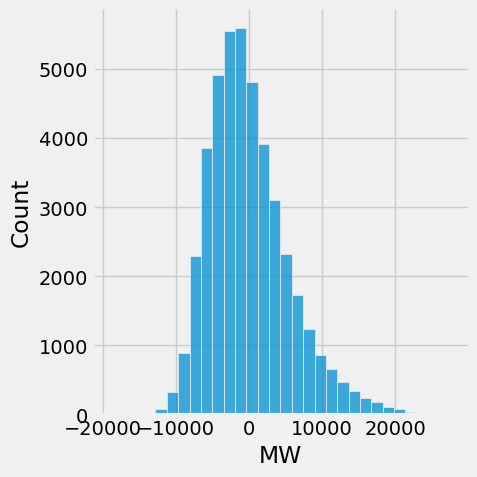

In [24]:
# observe the accuracy of our linear model

prediction = lm.predict(X_test)
sns.displot((y_test-prediction),bins=30)

In [25]:
from sklearn import metrics

RMSE = np.sqrt(metrics.mean_squared_error(y_test,prediction))
RMSE

5492.682708000237